# <b>CS156 (Introduction to AI), Spring 2022</b>
# <u><b>Final term project</b></u>

### Roster Name: Ricky Kuang
### Preferred Name (if different):
### Student ID: 014077440
### Email address: ricky.kuang@sjsu.edu
Any special notes or anything you would like to communicate to me about this project submission goes in here.

##  <u> Project description/introduction text (the background information) </u>

The problem that I will be attempting to solve for this term project is to identify what factors may play a role in affecting one’s annual income. There have been many debates over income inequality, whether it’s in the United States or in some other part of the world. It may be an interest to identify what factors may potentially play a role in creating such a problem. The prediction problem is to predict whether a person makes below or at least $50,000 based on different factors about themselves. I think it’s an interesting problem to solve because it allows us to learn what factors may play a big role in how much income one makes, and it may be able to identify what combination of factors allow one to have higher annual income. It’s important to solve this problem because it will help explain what affects the income of an individual, which will help point us to potential solutions to increase overall income or putting more focus on areas like education if that is an influential factor on annual income. There have been previous attempts to solve this problem, as I’ve noticed others using methods like KNN or decision trees to identify what factors may affect annual income. I plan to take a similar approach for this term project by taking factors such as education and occupation to try and arrive at a solution to the problem.

##  <u> Machine learning algorithm selected for this project </u>

The algorithm that I used for this project is the K Nearest Neighbors algorithm. Since this is a classification problem that aims to see which factors contribute to one's annual income, I felt that running the KNN algorithm on this dataset would help pinpoint whether these factors do in fact play a role in annual income being below or above $50K.

##  <u> Dataset source </u>

https://www.kaggle.com/datasets/lodetomasi1995/income-classification?datasetId=149550&searchQuery=scatter

##  <u> References and sources </u>

List all your references and sources here.
This includes all sites/discussion boards/blogs/posts/etc. where you grabbed some code examples.

- Example Jupyter Notebooks, CS156, Yulia Newton
- Matplotlib plot manipulation: https://pythonguides.com/matplotlib-increase-plot-size/
- Select dtype: https://www.geeksforgeeks.org/python-pandas-dataframe-select_dtypes/

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [22]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.decomposition import PCA

In [23]:
np.random.seed(42)

#### Code the solution

Load the dataset, set the X and Y values

In [24]:
data = pd.read_csv('./DataSets/income/train.csv')
X = data.iloc[:, :-1]
Y = data.iloc[:, -1:]
class_names = ['<=50K', '>50K']

X.shape, Y.shape

((43957, 14), (43957, 1))

Create pandas dataframe, rename some columns for access

In [25]:
income_df = pd.DataFrame(X, columns=X.columns)
income_df['income50K'] = Y

income_df.rename(columns={'native-country':'native_country', 
                          'capital-gain':'capital_gain', 
                          'educational-num':'educational_num',
                          'marital-status':'marital_status',
                          'capital-loss':'capital_loss',
                          'hours-per-week':'hours_per_week'},
                          inplace=True)

income_df.head()

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [26]:
income_df.drop(['fnlwgt', 'education', 'native_country'], axis='columns', inplace=True)
X = income_df.iloc[:, :-1]

In [27]:
print(X.columns.shape)
income_df.head()

(11,)


,age,workclass,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,income50K
0,67,Private,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,1
1,17,Private,8,Never-married,Other-service,Own-child,White,Male,0,0,15,0
2,31,Private,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,1
3,58,State-gov,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,0
4,25,State-gov,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,0


Convert categorical columns into numeric ones.

In [28]:
income_df.dtypes
X1 = X.select_dtypes(['object'])
X2 = X.select_dtypes(['float', 'int64'])

X1.shape, X2.shape

((43957, 6), (43957, 5))

In [29]:
for i in X1:
    print(i)

workclass
marital_status
occupation
relationship
race
gender


In [30]:
for i in X2:
    print(i)

age
educational_num
capital_gain
capital_loss
hours_per_week


In [31]:
for column in X1:
    values = income_df[column].unique()
    size = len(values)
    # print(size)

    mapping = []
    for i in range(size):
        mapping.append(i)

    income_df[column].replace(values, mapping, inplace=True)
    print(column)
    print(values, mapping)

workclass
['Private' 'State-gov' 'Self-emp-not-inc' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' nan 'Never-worked' 'Without-pay'] [0, 1, 2, 3, 4, 5, 6, 7, 8]
marital_status
['Divorced' 'Never-married' 'Married-civ-spouse' 'Widowed' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse'] [0, 1, 2, 3, 4, 5, 6]
occupation
['Exec-managerial' 'Other-service' 'Transport-moving' 'Adm-clerical'
 'Machine-op-inspct' 'Sales' 'Handlers-cleaners' 'Farming-fishing'
 'Protective-serv' 'Prof-specialty' 'Craft-repair' nan 'Tech-support'
 'Priv-house-serv' 'Armed-Forces'] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
relationship
['Not-in-family' 'Own-child' 'Husband' 'Wife' 'Unmarried' 'Other-relative'] [0, 1, 2, 3, 4, 5]
race
['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo'] [0, 1, 2, 3, 4]
gender
['Male' 'Female'] [0, 1]


In [32]:
income_df.head()

,age,workclass,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,income50K
0,67,0,16,0,0,0,0,0,99999,0,60,1
1,17,0,8,1,1,1,0,0,0,0,15,0
2,31,0,13,2,0,2,0,0,0,0,40,1
3,58,1,4,2,2,2,0,0,0,0,40,0
4,25,1,10,1,1,0,1,0,0,0,40,0


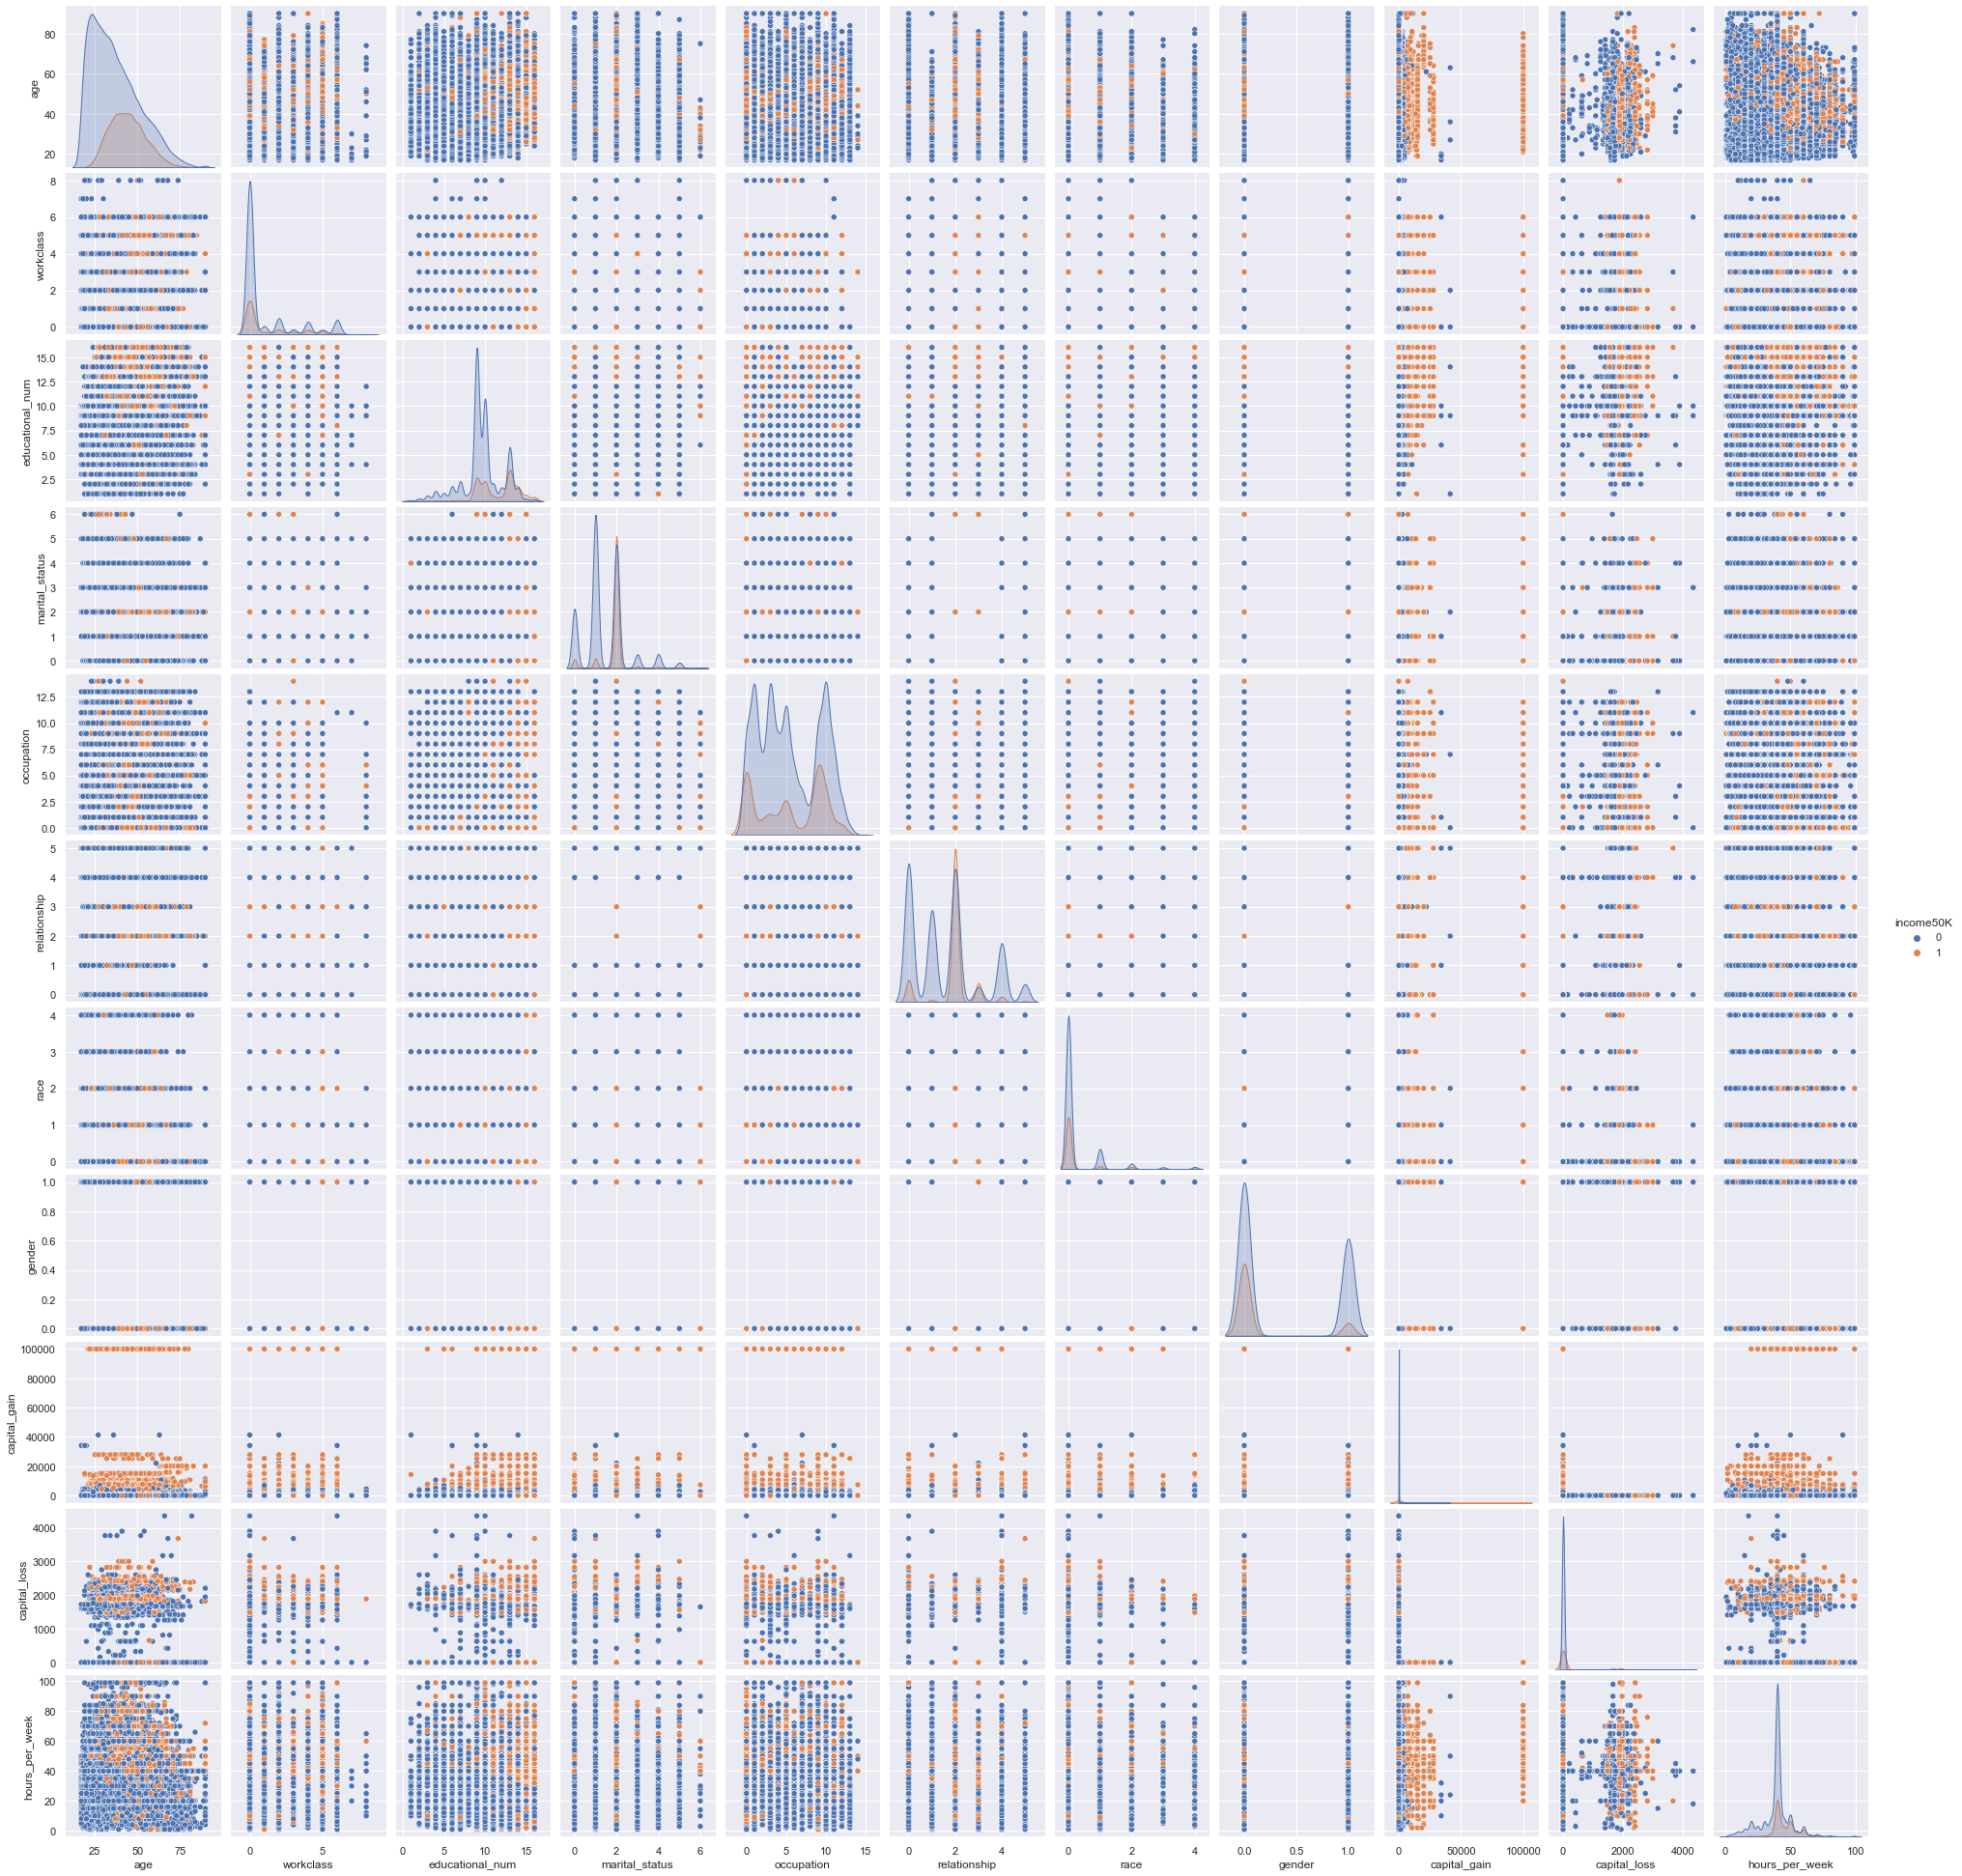

In [33]:
sns.set(rc={'figure.figsize': (5,5)})
sns.pairplot(income_df,hue='income50K')

<AxesSubplot:>

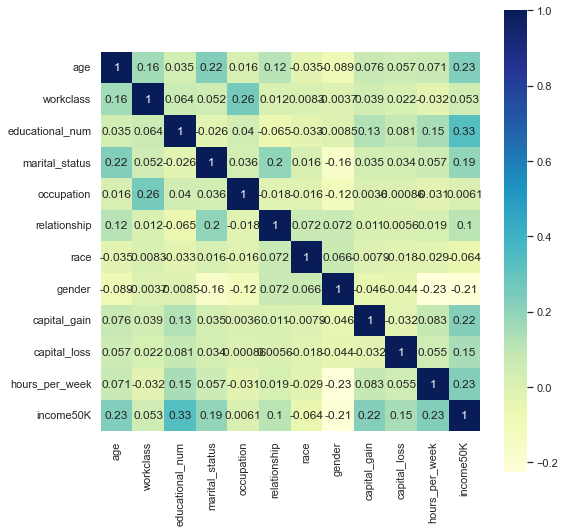

In [34]:
correlation = income_df.corr()
sns.set(rc={'figure.figsize': (8.5,8.5)})
sns.heatmap(correlation, square=True, cmap='YlGnBu', annot=True)

Split the data into training and test data.

In [35]:
X = income_df.iloc[:, :-1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((35165, 11), (35165, 1), (8792, 11), (8792, 1))

Fit the model using the X training data and the Y training data.

In [36]:
knnModel1 = KNeighborsClassifier(n_neighbors=10)
knnModel1.fit(X_train, Y_train)

knnModel2 = KNeighborsClassifier(n_neighbors=50)
knnModel2.fit(X_train, Y_train)

knnModel3 = KNeighborsClassifier(n_neighbors=100)
knnModel3.fit(X_train, Y_train)

knnModel4 = KNeighborsClassifier(n_neighbors=200)
knnModel4.fit(X_train, Y_train)

knnModel5 = KNeighborsClassifier(n_neighbors=1000)
knnModel5.fit(X_train, Y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighb

KNeighborsClassifier(n_neighbors=1000)

Performance on training data

In [ ]:
pred_results1 = knnModel1.predict(X_train)
pred_results2 = knnModel2.predict(X_train)
pred_results3 = knnModel3.predict(X_train)
pred_results4 = knnModel4.predict(X_train)
pred_results5 = knnModel5.predict(X_train)

print('KNN 10 neighbors accuracy: {:.2f}%'.format(accuracy_score(Y_train.values.ravel(), pred_results1)))
print('KNN 50 neighbors accuracy: {:.2f}%'.format(accuracy_score(Y_train.values.ravel(), pred_results2)))
print('KNN 100 neighbors accuracy: {:.2f}%'.format(accuracy_score(Y_train.values.ravel(), pred_results3)))
print('KNN 200 neighbors accuracy: {:.2f}%'.format(accuracy_score(Y_train.values.ravel(), pred_results4)))
print('KNN 1000 neighbors accuracy: {:.2f}%'.format(accuracy_score(Y_train.values.ravel(), pred_results5)))

Use the X_test data to make predictions using the KNN model.

In [37]:
pred_results1 = knnModel1.predict(X_test)
pred_results2 = knnModel2.predict(X_test)
pred_results3 = knnModel3.predict(X_test)
pred_results4 = knnModel4.predict(X_test)
pred_results5 = knnModel5.predict(X_test)

Create function to check the accuracy between the results of the model predictions and the Y_test data.

In [38]:
print('KNN 10 neighbors accuracy: {:.2f}%'.format(accuracy_score(Y_test.values.ravel(), pred_results1)))
print('KNN 50 neighbors accuracy: {:.2f}%'.format(accuracy_score(Y_test.values.ravel(), pred_results2)))
print('KNN 100 neighbors accuracy: {:.2f}%'.format(accuracy_score(Y_test.values.ravel(), pred_results3)))
print('KNN 200 neighbors accuracy: {:.2f}%'.format(accuracy_score(Y_test.values.ravel(), pred_results4)))
print('KNN 1000 neighbors accuracy: {:.2f}%'.format(accuracy_score(Y_test.values.ravel(), pred_results5)))

KNN 10 neighbors accuracy: 0.85%
KNN 50 neighbors accuracy: 0.84%
KNN 100 neighbors accuracy: 0.84%
KNN 200 neighbors accuracy: 0.83%
KNN 1000 neighbors accuracy: 0.81%


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[6288  387]
 [ 926 1191]]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix
[[0.94 0.06]
 [0.44 0.56]]


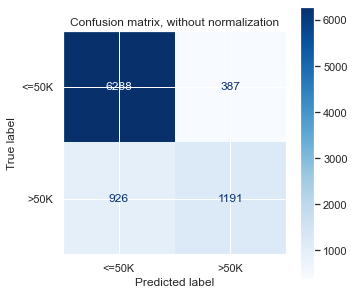

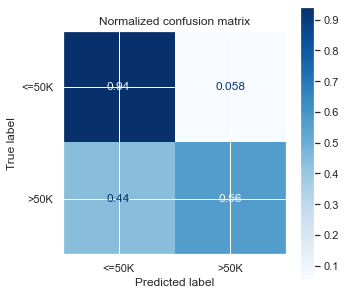

In [47]:
np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(knnModel1, X_test, Y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.rcParams["figure.figsize"] = (5,5)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[6322  353]
 [1014 1103]]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix
[[0.95 0.05]
 [0.48 0.52]]


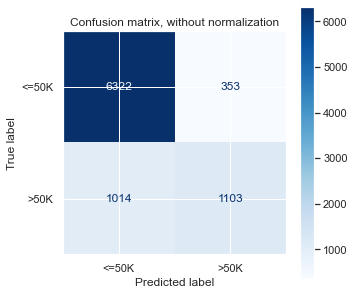

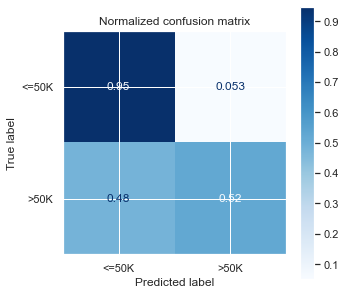

In [41]:
np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(knnModel2, X_test, Y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.rcParams["figure.figsize"] = (5,5)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[6353  322]
 [1102 1015]]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix
[[0.95 0.05]
 [0.52 0.48]]


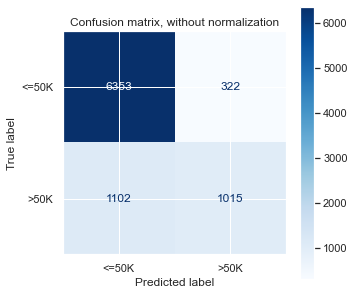

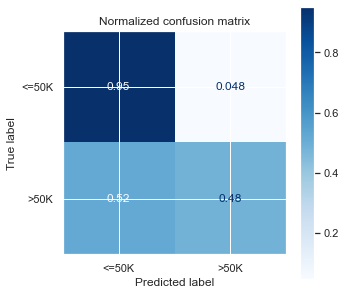

In [42]:
np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(knnModel3, X_test, Y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.rcParams["figure.figsize"] = (5,5)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[6444  231]
 [1239  878]]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix
[[0.97 0.03]
 [0.59 0.41]]


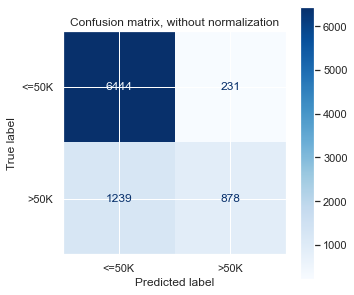

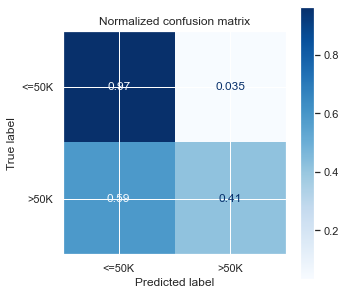

In [43]:
np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(knnModel4, X_test, Y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.rcParams["figure.figsize"] = (5,5)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[6541  134]
 [1544  573]]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix
[[0.98 0.02]
 [0.73 0.27]]


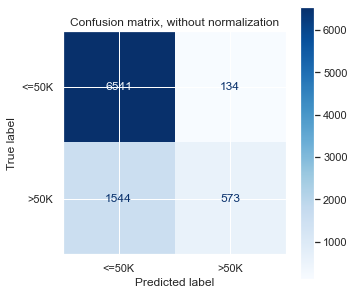

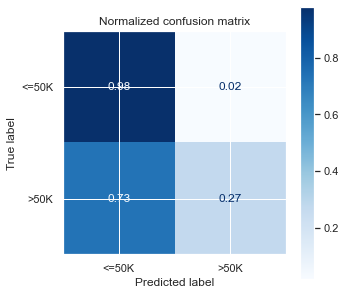

In [44]:
np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(knnModel5, X_test, Y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.rcParams["figure.figsize"] = (5,5)
plt.show()